# LSA
Latent Semantic Analysis

TDM
- (단어-주제행렬)\*특잇값\*(주제-문서행렬)
    - U = (단어-주제)
    - s = 특잇값
    - Vt = (주제-문서)
- **단어주제 - 주제문서**

In [5]:
import numpy as np
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import randomized_svd
from sklearn.feature_extraction.text import CountVectorizer

/opt/anaconda3/envs/AI_dev/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [311]:
class LSA:
    def __init__(self, doc_ls, topic_num, verbose=True):
        self.doc_ls = doc_ls
        self.k = topic_num
        self.term2idx, self.idx2term = self.toIdxDict(self.doc_ls, split=True)
        self.doc2idx, self.idx2doc = self.toIdxDict(self.doc_ls, split=False)
        
        self.tdm = self.TDM(doc_ls)        
        self.U, self.s, self.Vt = self.SVD(self.tdm)
        
        if verbose:
            print('TDM\n', self.tdm, '\n===')
            print('U - 단어-주제 행렬\n', self.U, '\n===')
            print('s\n', self.s, '\n===')
            print('Vt - 주제-문서 행렬 \n', self.Vt, '\n===')
            
#         self.term_mat = self.TermVectorMatrix(self.U)
#         self.doc_mat = self.DocVectorMatrix(self.Vt)
        
    def toIdxDict(self, ls, split):
        comp2id = defaultdict(lambda : len(comp2id))
        
        if split:
            ls_split = [ls_.split() for ls_ in ls]
            [comp2id[token] for sp in ls_split for token in sp]
        
        else:
            [comp2id[doc] for doc in ls]
        
        id2comp = {v:k for (k,v) in comp2id.items()}
        #print(comp2id, id2comp)
        return comp2id, id2comp
    
    def TDM(self, doc_ls):
        tdm = np.zeros((len(self.term2idx), len(self.doc2idx)))
        dtm = tdm.T
        
        for i, doc in enumerate(doc_ls):
            term_ls = doc.split()
            count = [0] * len(self.term2idx)
            for term in term_ls:
                if term in self.term2idx.keys():
                    count[self.term2idx[term]] += 1
            dtm[i] = np.array(count)
        
        return dtm.T
        
    
    def SVD(self, tdm):
        return randomized_svd(tdm, n_components = self.k)
    
    def topicModeling(self):
        
        topic_idx_dict = {topic_idx:0 for topic_idx in range(self.k)}
        topic_idx_by_keywords = self.U.argmax(axis=1) 
        #print(topic_idx_by_keywords)
        #print(self.term2idx.keys())
#         term2topic = {term:topic_idx for (term, topic_idx) in zip(self.term2idx.keys(),
#                                                                    topic_idx_by_keywords)}
        
        term2topic = {term:topic_idx for term, topic_idx in zip(self.term2idx.keys(),
                                                                topic_idx_by_keywords)}
        #print(term2topic)
        #print(term2topic)
        
        topic2term = {topic_idx:[] for topic_idx in term2topic.values()}
        [topic2term[topic_idx].append(term) for term, topic_idx in term2topic.items()]
        print('주제별 키워드\n', topic2term, '\n')
                
        # 주제별 Top 5 keywords
        top=5
        for idx, topic in enumerate(self.U.T):
            print(f"Topic {idx+1} - Top {top} keywords")
            idx = np.argsort(-topic)[:n]
            for i in idx:
                print(vocab[i], topic[i], end=' ')
            print('\n')
        print('===')
        
        doc2topic = {self.idx2doc[i]:arr.argmax() for i, arr in enumerate(self.Vt.T)}
        print('문서별 주제\n', doc2topic)
        
    
    # 입력받은 단어의 인덱스에 대응하는 주제 가중치 벡터를 리턴
    def getTermVector(self, term):
        vect = self.U[self.term2idx[term]]
        return vect
    
    # 입력받은 문서의 인덱스에 대응하는 주제 가중치 벡터를 리턴
    def getDocVector(self, doc):
        vect = self.Vt.T[self.doc2idx[doc]]
        return vect
    
    def getTermSimilarity(self, term1, term2):
        #print(self.getTermVector(term1), self.getTermVector(term2))
        return cosine_similarity([self.getTermVector(term1)], [self.getTermVector(term2)])
    
    def getDocSimilarity(self, doc1, doc2):
        #print([self.getDocVector(doc1)], [self.getDocVector(doc2)])
        return cosine_similarity([self.getDocVector(doc1)], [self.getDocVector(doc2)])

In [312]:
doc_ls = ['바나나 사과 포도 포도 짜장면',
         '사과 포도',
         '포도 바나나',
         '짜장면 짬뽕 탕수육',
         '볶음밥 탕수육',
         '짜장면 짬뽕',
         '라면 스시',
         '스시 짜장면',
         '가츠동 스시 소바',
         '된장찌개 김치찌개 김치',
         '김치 된장 짜장면',
         '비빔밥 김치'
         ]

In [313]:
# topics = 과일, 한식, 중식, 일식
lsa = LSA(doc_ls, 4)

TDM
 [[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] 
===
U - 단어-주제 행렬
 [[ 0.34843127 -0.19370961  0.01592593  0.03744775]
 [ 0.34843127 -0.19370961  0.01592593  0.03744775]
 [ 0.69686254 -0.38741921  0.03185185  0.07489549]
 [ 0.48563449  0.58415588 -0.07468389 -0.18737521]
 [ 0.12448389  0.3555557  -0.10291629 -0.34945274]
 [ 0.0736207   0.24835482 -0.0884251  -0.3228814 ]
 [ 0.00783718  0.04982669 -0.02671012 -0.1077

In [306]:
lsa.topicModeling()

주제별 키워드
 {0: ['바나나', '사과', '포도'], 1: ['짜장면', '짬뽕', '탕수육', '볶음밥', '된장'], 3: ['라면', '스시', '가츠동', '소바'], 2: ['된장찌개', '김치찌개', '김치', '비빔밥']} 

Topic 1 - Top 5 keywords
김치찌개 0.6968625387988912 된장 0.4856344888220906 김치 0.3484312693994458 가츠동 0.34843126939944546 된장찌개 0.12448389316882004 

Topic 2 - Top 5 keywords
된장 0.5841558837852067 된장찌개 0.3555556968187593 짬뽕 0.337001471912978 비빔밥 0.2560082778375643 라면 0.2483548163330755 

Topic 3 - Top 5 keywords
짬뽕 0.6109035277294098 스시 0.2643978491951772 짜장면 0.2643978491951772 포도 0.18453253137212702 탕수육 0.16197314716210576 

Topic 4 - Top 5 keywords
비빔밥 0.552388449634671 짬뽕 0.37136541740505935 사과 0.27669846418415417 소바 0.27669846418415417 스시 0.18602170395678433 

===
문서별 주제
 {'바나나 사과 포도 포도 짜장면': 0, '사과 포도': 0, '포도 바나나': 0, '짜장면 짬뽕 탕수육': 1, '볶음밥 탕수육': 1, '짜장면 짬뽕': 1, '라면 스시': 3, '스시 짜장면': 1, '가츠동 스시 소바': 3, '된장찌개 김치찌개 김치': 2, '김치 된장 짜장면': 1, '비빔밥 김치': 2}


# Test

In [270]:
lsa.getTermSimilarity('짜장면', '짬뽕')

array([[0.82866275]])

In [271]:
lsa.getTermSimilarity('사과', '포도')

array([[1.]])

In [272]:
lsa.getDocSimilarity('짜장면 짬뽕 탕수육', '볶음밥 탕수육')

array([[0.92822084]])

In [273]:
lsa.getDocSimilarity('짜장면 짬뽕 탕수육', '스시 짜장면')

array([[0.45326471]])

In [274]:
lsa.getDocSimilarity('짜장면 짬뽕 탕수육', '김치 된장 짜장면')

array([[0.38990299]])

In [275]:
lsa.getDocSimilarity('바나나 사과 포도 포도 짜장면',
                    '된장찌개 김치찌개 김치')

array([[-0.02188511]])

## Scikit-learn SVD
- TfidfVectorizer는 DTM 행렬을 반환
- 따라서, SVD로 추출되는 행렬 순서가 바뀜
    - TDM -> (단어-주제행렬)\*특잇값\*(주제-문서행렬)
    - DTM -> (문서-주제행렬)\*특잇값\*(주제-단어행렬)

In [263]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

n_topic = 4
tfidf_vect = TfidfVectorizer(max_features=1000,
                            max_df=0.5,
                            smooth_idf=True)

tfidf = tfidf_vect.fit_transform(doc_ls) # DTM (Document Term Matrix) 반환.

In [309]:
svd = TruncatedSVD(n_components = n_topic,
                  n_iter = 50)
# 문서-주제 행렬
U = svd.fit_transform(tfidf)
U

array([[ 8.62256757e-01, -4.91447821e-01,  4.52944480e-03,
         7.49424232e-04],
       [ 6.32751317e-01, -5.55810945e-01,  2.35286540e-02,
         7.78388631e-03],
       [ 6.32751317e-01, -5.55810945e-01,  2.35286540e-02,
         7.78388631e-03],
       [ 5.18573477e-01,  5.96770860e-01, -3.79277778e-01,
        -3.60649674e-01],
       [ 1.38317485e-01,  2.12568849e-01, -2.62268267e-01,
        -2.86967310e-01],
       [ 5.34670591e-01,  5.74617388e-01, -2.79726466e-01,
        -2.42689257e-01],
       [ 1.74373883e-01,  2.69930957e-01,  7.05824909e-01,
         7.82416162e-02],
       [ 4.82931107e-01,  5.21967333e-01,  4.99381568e-01,
         4.16950646e-02],
       [ 1.47354498e-01,  2.32876931e-01,  6.47843111e-01,
         7.29309504e-02],
       [ 7.47549948e-02,  1.13485365e-01, -1.98909307e-01,
         6.60904680e-01],
       [ 3.50370733e-01,  3.63766364e-01, -2.19272209e-01,
         5.40352829e-01],
       [ 8.84623061e-02,  1.31542498e-01, -2.16711641e-01,
      

In [310]:
# 주제-단어 행렬
Vt = svd.components_
Vt

array([[ 0.03615365,  0.10978603,  0.01834125,  0.09862335,  0.01834125,
         0.05470036,  0.3297113 ,  0.04131708,  0.02775026,  0.3297113 ,
         0.03615365,  0.21640648,  0.4991573 ,  0.29964085,  0.1641898 ,
         0.58250527],
       [ 0.06740048,  0.15347979,  0.03284554,  0.12078756,  0.03284554,
         0.09988705, -0.28961955,  0.07490311,  0.04867686, -0.28961955,
         0.06740048,  0.31494725,  0.43992407,  0.39142644,  0.23904844,
        -0.51167464],
       [ 0.25326653, -0.21577691, -0.07776122, -0.09834554, -0.07776122,
         0.35279702,  0.01226021, -0.12482955, -0.10832038,  0.01226021,
         0.25326653,  0.70278052, -0.07237264, -0.29248516, -0.25719626,
         0.02166027],
       [ 0.02997407,  0.68200798,  0.27162684,  0.25478532,  0.27162684,
         0.04111418,  0.00405599, -0.14359192,  0.37257919,  0.00405599,
         0.02997407,  0.0752597 , -0.02641656, -0.27990967, -0.2732592 ,
         0.00716578]])

In [288]:
vocab = tfidf_vect.get_feature_names()
n = 5

for idx, topic in enumerate(U):
    print("Topic {}".format(idx + 1))
    idx = np.argsort(-topic)[:n]
    for i in idx:
        print(vocab[i], topic[i], end=' ')
    print('\n\n')

Topic 1
포도 0.5825052697793935 짜장면 0.4991573043017831 사과 0.3297112994110668 바나나 0.3297112994110666 짬뽕 0.29964084900746235 


Topic 2
짜장면 0.4399240681700938 짬뽕 0.39142644330523046 스시 0.3149472457003219 탕수육 0.23904843954296148 김치 0.15347979325355154 


Topic 3
스시 0.7027805168888092 라면 0.3527970198022138 소바 0.25326652887506307 가츠동 0.253266528875063 포도 0.02166027091602387 


Topic 4
김치 0.6820079774477787 비빔밥 0.372579187602383 김치찌개 0.27162683779561864 된장찌개 0.2716268377956186 된장 0.25478532366259343 




In [308]:
# custom model과 비교
lsa.topicModeling()

주제별 키워드
 {0: ['바나나', '사과', '포도'], 1: ['짜장면', '짬뽕', '탕수육', '볶음밥', '된장'], 3: ['라면', '스시', '가츠동', '소바'], 2: ['된장찌개', '김치찌개', '김치', '비빔밥']} 

Topic 1 - Top 5 keywords
김치찌개 0.6968625387988912 된장 0.4856344888220906 김치 0.3484312693994458 가츠동 0.34843126939944546 된장찌개 0.12448389316882004 

Topic 2 - Top 5 keywords
된장 0.5841558837852067 된장찌개 0.3555556968187593 짬뽕 0.337001471912978 비빔밥 0.2560082778375643 라면 0.2483548163330755 

Topic 3 - Top 5 keywords
짬뽕 0.6109035277294098 스시 0.2643978491951772 짜장면 0.2643978491951772 포도 0.18453253137212702 탕수육 0.16197314716210576 

Topic 4 - Top 5 keywords
비빔밥 0.552388449634671 짬뽕 0.37136541740505935 사과 0.27669846418415417 소바 0.27669846418415417 스시 0.18602170395678433 

===
문서별 주제
 {'바나나 사과 포도 포도 짜장면': 0, '사과 포도': 0, '포도 바나나': 0, '짜장면 짬뽕 탕수육': 1, '볶음밥 탕수육': 1, '짜장면 짬뽕': 1, '라면 스시': 3, '스시 짜장면': 1, '가츠동 스시 소바': 3, '된장찌개 김치찌개 김치': 2, '김치 된장 짜장면': 1, '비빔밥 김치': 2}


## 시각화?

In [358]:
def calc_similarity_matrix(vectors):
    n_word = len(vectors)
    similarity_matrix = np.zeros((n_word, n_word))
    
    for i in range(n_word):
        for j in range(i, n_word):
            similarity_matrix[j, i] = cosine_similarity(vectors[i],
                                                       vectors[j]).round(4)
            
    return similarity_matrix

In [359]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix, vocab):
    mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
    plt.rcParams['figure.figsize'] = [8, 6]
    ax = sns.heatmap(similarity_matrix, mask = mask,
                     xticklabels=vocab,
                     yticklabels=vocab,
                    annot=True,
                    fmt=".2f",
                    annot_kws={'size':8})  

In [360]:
vocab_eng = ['katsudon', 'kimchi', 'kimchijjige', 'doenjang', 'doenjangjjige', 'ramen',
'banana', 'fried rice', 'bibimbap', 'apple', 'soba', 'sushi','jjajangmen',
'jjambbong', 'tangsooyook', 'grape']

In [361]:
# 단어 - 주제 행렬
# 각 행렬을 1차원에서 2차원으로 변환
svd_comp_2d = [np.array([comp]) for comp in svd.components_.T]
svd_comp_2d

[array([[0.03615365, 0.06740048, 0.25326653, 0.02997407]]),
 array([[ 0.10978603,  0.15347979, -0.21577691,  0.68200798]]),
 array([[ 0.01834125,  0.03284554, -0.07776122,  0.27162684]]),
 array([[ 0.09862335,  0.12078756, -0.09834554,  0.25478532]]),
 array([[ 0.01834125,  0.03284554, -0.07776122,  0.27162684]]),
 array([[0.05470036, 0.09988705, 0.35279702, 0.04111418]]),
 array([[ 0.3297113 , -0.28961955,  0.01226021,  0.00405599]]),
 array([[ 0.04131708,  0.07490311, -0.12482955, -0.14359192]]),
 array([[ 0.02775026,  0.04867686, -0.10832038,  0.37257919]]),
 array([[ 0.3297113 , -0.28961955,  0.01226021,  0.00405599]]),
 array([[0.03615365, 0.06740048, 0.25326653, 0.02997407]]),
 array([[0.21640648, 0.31494725, 0.70278052, 0.0752597 ]]),
 array([[ 0.4991573 ,  0.43992407, -0.07237264, -0.02641656]]),
 array([[ 0.29964085,  0.39142644, -0.29248516, -0.27990967]]),
 array([[ 0.1641898 ,  0.23904844, -0.25719626, -0.2732592 ]]),
 array([[ 0.58250527, -0.51167464,  0.02166027,  0.00716

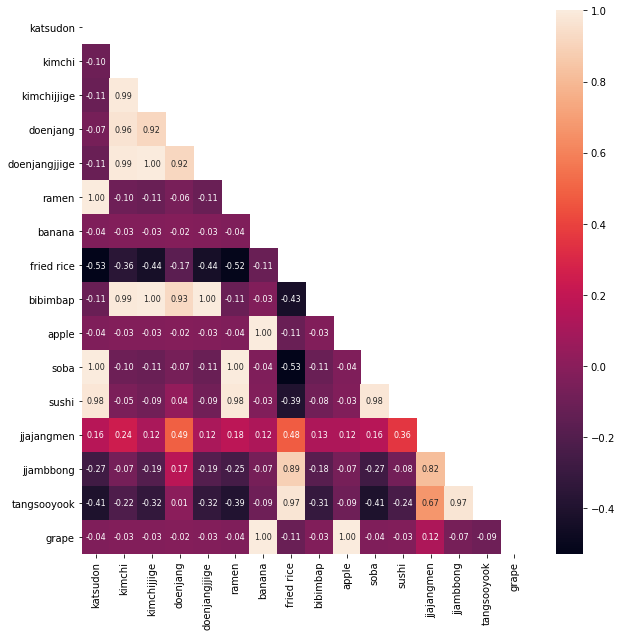

In [365]:
f = plt.figure(figsize=(10,10))
visualize_similarity(calc_similarity_matrix(svd_comp_2d),
                    vocab_eng)